In [40]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import os
import json
import seaborn

# s = json.load( open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json') )
# pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Can we measure and predict energy use based on observables that are easy to acquire?

In [2]:
nrg = pd.read_csv(os.getenv("PUIDATA") + '/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [3]:
get_ipython().system("curl -O 'http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  17.2M      0 --:--:-- --:--:-- --:--:-- 17.4M


In [4]:
os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

0

In [5]:
os.system("unzip " + os.getenv("PUIDATA") + '/' + "mn_mappluto_16v1.zip")

256

In [6]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + '/manhattan/MNMapPLUTO.shp')
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [7]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [8]:
bsize.drop([u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis=1, inplace=True)

In [9]:
bsize.columns

Index([u'BBL', u'UnitsRes', u'UnitsTotal'], dtype='object')

In [10]:
os.path.isfile(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

True

In [11]:
os.path.isfile(os.getenv("PUIDATA") + "/manhattan/MNMapPLUTO.shp")

True

In [12]:
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace=True)
# nrg.head()

In [13]:
nrg.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf425c9410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbf1fe2bcd0>]], dtype=object)

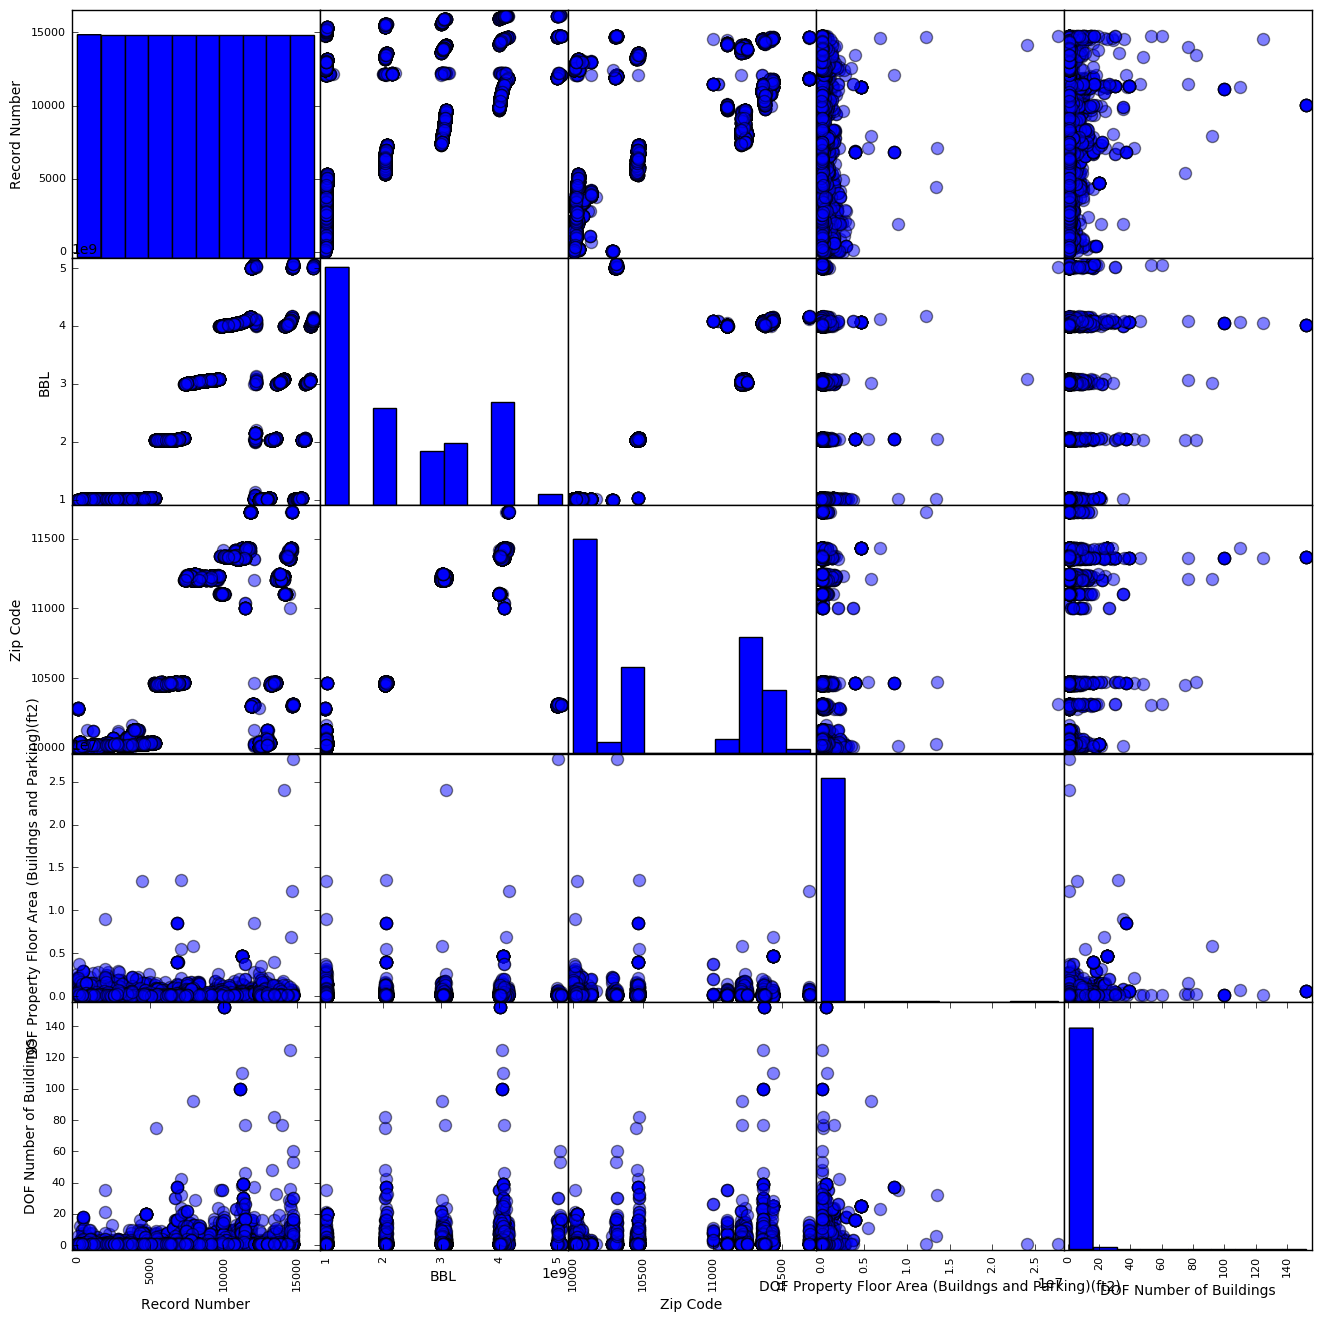

In [14]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

### columns from bsize that we want to keep are: BBL
### columns from nrg that we want to keep are: BBL, Site EUI(kBtu/ft2), Reported Property Floor Area (Building(s)) (ft²)

In [15]:
nrg.drop([u'Record Number', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'], axis=1, inplace=True)

In [16]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,Not Available,918919
1,4.021460e+09,NaN,NaN,NaN
2,2.027620e+09,NaN,Not Available,64200
3,1.006700e+09,NaN,NaN,NaN
4,2.048300e+09,NaN,Not Available,50000


In [17]:
nrg.columns

Index([u'BBL', u'Site EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Reported Property Floor Area (Building(s)) (ft²)'],
      dtype='object')

In [18]:
nrg.drop(['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'], axis=1, inplace=True)

In [19]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,918919
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000


In [20]:
bblnrgdata = pd.merge(nrg, bsize, on=['BBL'])
bblnrgdata.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)


,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal
0,1.006700e+09,NaN,NaN,0,1
1,1.004370e+09,NaN,NaN,0,4
2,1.013110e+09,125.4,330000,0,56
3,1.009220e+09,NaN,NaN,148,148
4,1.007400e+09,NaN,68329,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf5271f910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbf23775c90>]], dtype=object)

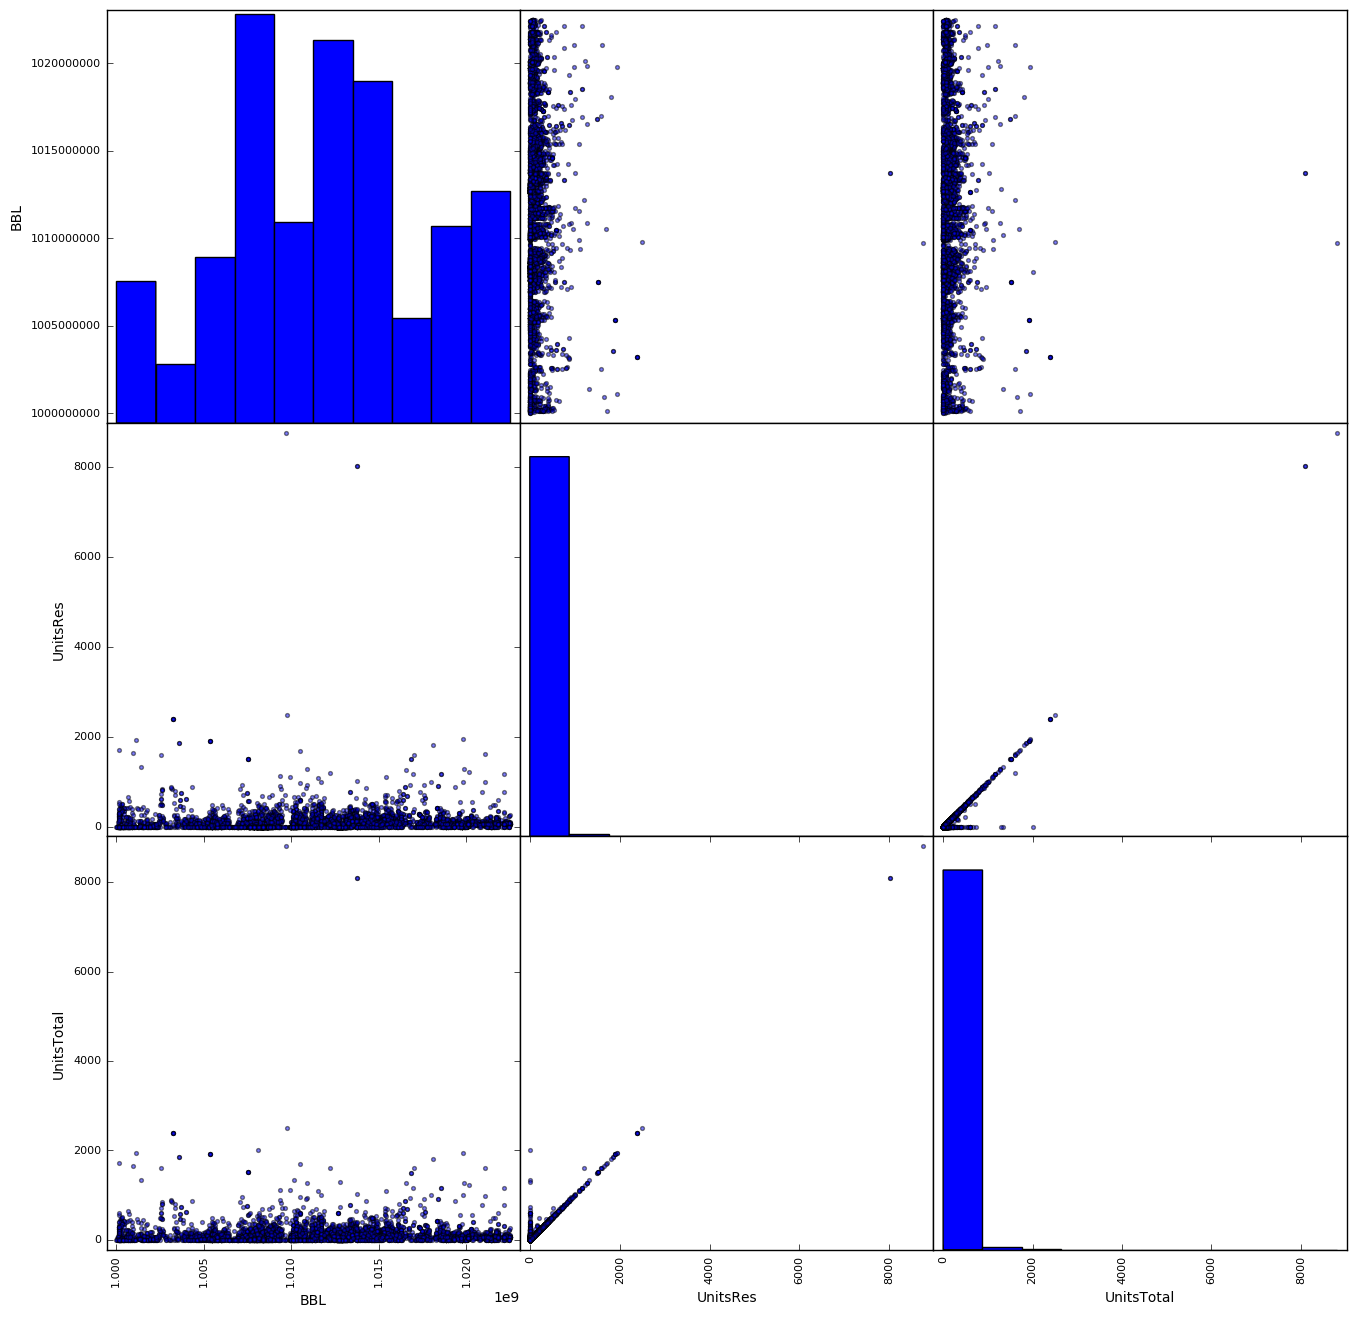

In [36]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

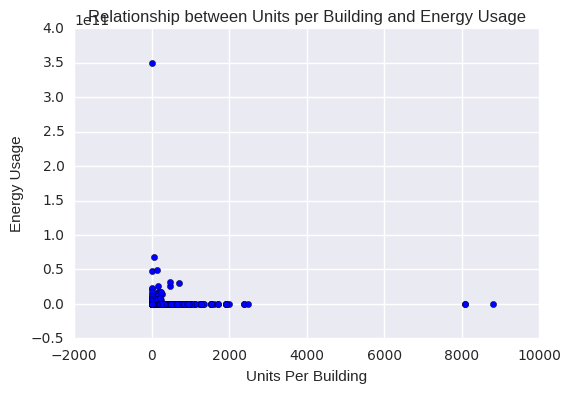

In [93]:
x = pd.to_numeric(bblnrgdata['UnitsTotal'],errors="coerce")
# the following calculates the energy use for the whole building
energypersqft = pd.to_numeric(bblnrgdata['Site EUI(kBtu/ft2)'],errors="coerce")
area = pd.to_numeric(bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')
y = energypersqft * area

plt.scatter(x, y)
plt.xlabel('Units Per Building')
plt.ylabel('Energy Usage')
plt.title('Relationship between Units per Building and Energy Usage')

(1, 2500)

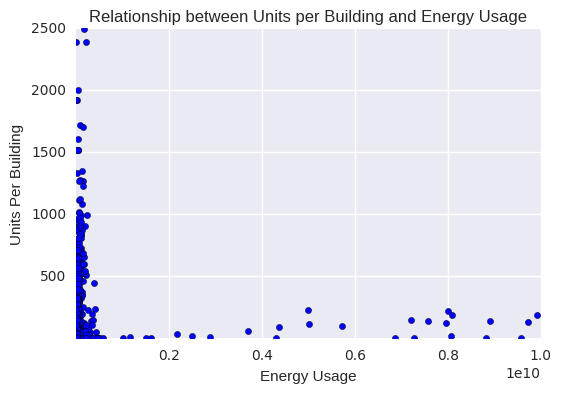

In [74]:
fig = plt.figure()

ax = plt.subplot(111)
ax.scatter(y, x)
plt.ylabel('Units Per Building')
plt.xlabel('Energy Usage')
plt.title('Relationship between Units per Building and Energy Usage')
plt.xlim(1000,1e10)
plt.ylim(1,2500)

(1, 2500)

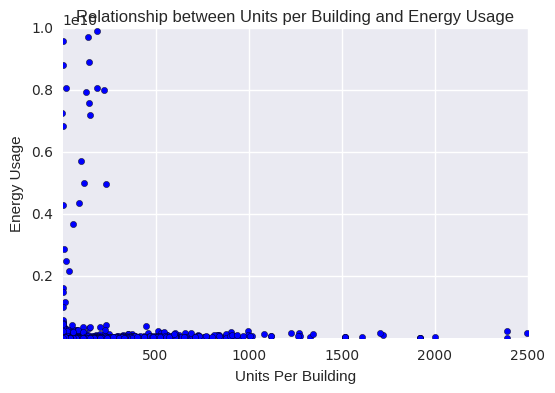

In [78]:
fig2 = plt.figure()

axx = plt.subplot(111)
axx.scatter(x, y)
plt.xlabel('Units Per Building')
plt.ylabel('Energy Usage')
plt.title('Relationship between Units per Building and Energy Usage')
plt.ylim(1000,1e10)
plt.xlim(1,2500)

In [96]:
xReal = x.dropna().values
energypersqftReal = energypersqft.dropna().values
areaReal = area.dropna().values

In [98]:
len(energypersqftReal)

5077

In [99]:
len(areaReal)

5579

In [101]:
areaReal_cut = np.random.choice(areaReal, 5077, replace = False)
len(areaReal_cut)

5077

In [103]:
yReal = energypersqftReal * areaReal_cut

In [ ]:
bblnrgdata_cut = bblnrgdata[y>0]

In [85]:
y_cut = pd.to_numeric(bblnrgdata_cut['Site EUI(kBtu/ft2)'],errors="coerce") * pd.to_numeric(bblnrgdata_cut['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')